### Pipeline gerarchica

**PIPELINE - APPROCCIO GERARCHICO**

Contributo algoritmico per semplificare il grafo trovando strutture ripetitive-ricorsive al suo interno.

Procedura:

```
Identificare sottografo motif (figure come la prima iterazione di un frattale)
Collassare il motif in un solo nodo
Aggiornare il peso e il colore degli archi
Riapplicare il procedimento al grafo risultante (nuovo livello)
```

In [7]:
import networkx as nx
import itertools
from grandiso import find_motifs

In [8]:
%load_ext pycodestyle_magic
# %%pycodestyle

The pycodestyle_magic extension is already loaded. To reload it, use:
  %reload_ext pycodestyle_magic


#### Grafo test di base `G`

In [9]:
# grafo test di base G

G = nx.Graph()
G.add_edges_from([(1, 2), (2, 3), (2, 4), (2, 5), (4, 5), (3, 6), (4, 6), (5, 6)])
# nx.draw(G)

#### Sottografo `motif`

In [10]:
# Sottografo motif da trovare nel grafo G: TRIANGOLO

m1 = nx.Graph()
m1.add_edges_from([(1, 2), (2, 3), (3, 1)])
# nx.draw(m1)

In [5]:
# Sottografo motif da trovare nel grafo G: QUADRATO

m2 = nx.Graph()
m2.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 1)])
# nx.draw(m2)

## TODO: definisci una serie di pattern
- singolo nodo
- due nodi e un arco
- triangolo aperto
- quadrato aperto
- combinazioni varie
- stelle
- curve frattali
- insieme di julia

### Funzione che identifica e collassa il motif in un solo nodo rinominandolo

[1, 2, 3, 4, 5, 6]
[2, 4, 5]
[2, 4, 5]
[2, 4, 5]
{1: (1, 1), 2: (1, 2), 3: (1, 3), 4: (1, 2), 5: (1, 2), 6: (1, 6)}
[(1, 1), (1, 2), (1, 3), (1, 6)]


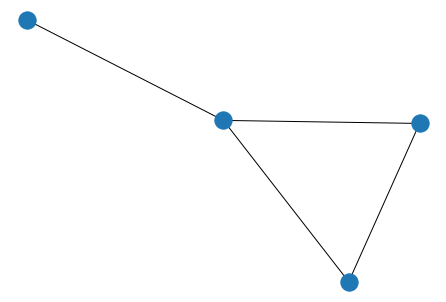

In [11]:
def contract_rename(G, motif):
    livello = 1
    
    lista1 = find_motifs(motif, G)
    lista2 = [list(d.values()) for d in lista1]
    lista3 = list(set(tuple(sorted(s)) for s in lista2))
    ris = [list(el) for el in lista3] 
    nodi = list(G.nodes())
    lun = len(nodi)
    liv_list = [livello for x in range(lun)]
    
    lista_temp = nodi[:]
    print(lista_temp)
    for x in lista_temp:
        if x in ris[0]:
            print(ris[0])
            lista_temp[x-1] = ris[0][0]
            
    lista_tuple = list(zip(liv_list, lista_temp))
    mapping1 = dict(zip(nodi, lista_tuple))
    print(mapping1)
    MMM = nx.relabel_nodes(G, mapping1)
    print(MMM.nodes())
    nx.draw(MMM)
    return MMM
G1 = contract_rename(G, m1)

#### Livello 1

[1, 2, 3, 4, 5, 6]
[2, 4, 5]
[2, 4, 5]
[2, 4, 5]
[(1, 1), (1, 2), (1, 3), (1, 6)]


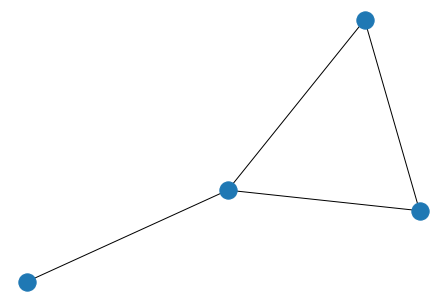

In [7]:
# Triangolo, primo livello
G1 = contract_rename(G, m1)

[1, 2, 3, 4, 5, 6]
[2, 3, 4, 6]
[2, 3, 4, 6]
[2, 3, 4, 6]
[2, 3, 4, 6]
{1: (1, 1), 2: (1, 2), 3: (1, 2), 4: (1, 2), 5: (1, 5), 6: (1, 2)}
[(1, 1), (1, 2), (1, 5)]


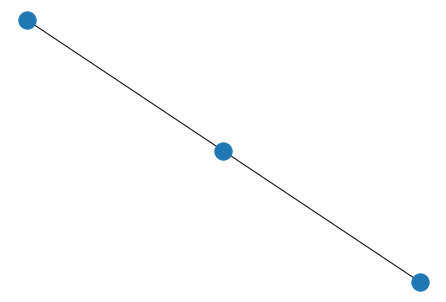

In [21]:
#quadrato

GQ = contract_rename(G, m2)

In [12]:
G1.nodes()

NodeView(((1, 1), (1, 2), (1, 3), (1, 6)))

In [18]:
zz = {1: 1, 2: 2, 3: 3, 6: 6}
H = nx.relabel_nodes(G1, zz, copy = True)
H.nodes()

NodeView(((1, 1), (1, 2), (1, 3), (1, 6)))

In [20]:
lista1 = find_motifs(m1, H)
lista1

[{1: (1, 2), 3: (1, 3), 2: (1, 6)},
 {1: (1, 2), 3: (1, 6), 2: (1, 3)},
 {1: (1, 3), 3: (1, 2), 2: (1, 6)},
 {1: (1, 3), 3: (1, 6), 2: (1, 2)},
 {1: (1, 6), 3: (1, 2), 2: (1, 3)},
 {1: (1, 6), 3: (1, 3), 2: (1, 2)}]

In [ ]:
G1_temp = 

#### Livello 2

[(1, 1), (1, 2), (1, 3), (1, 6)]
{(1, 1): (1, (1, 1)), (1, 2): (1, (1, 2)), (1, 3): (1, (1, 3)), (1, 6): (1, (1, 6))}
[(1, (1, 1)), (1, (1, 2)), (1, (1, 3)), (1, (1, 6))]


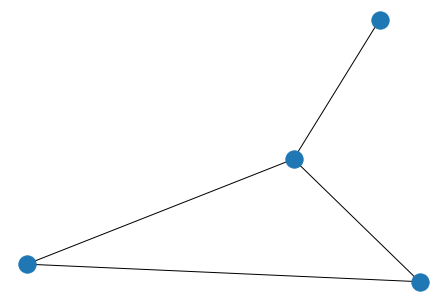

In [22]:
def contract_rename2(G, motif):
    livello = 1
    
    lista1 = find_motifs(motif, G)
    lista2 = [list(d.values()) for d in lista1]
    lista3 = list(set(tuple(sorted(s)) for s in lista2))
    ris = [list(el) for el in lista3] 
    nodi = list(G.nodes())
    lun = len(nodi)
    liv_list = [livello for x in range(lun)]
    
    lista_temp = nodi[:]
    print(lista_temp)
    for x in lista_temp[1]:
        if x in ris[0]:
            #print(ris[0])
            lista_temp[x-1] = ris[0][0]
            
    lista_tuple = list(zip(liv_list, lista_temp))
    mapping1 = dict(zip(nodi, lista_tuple))
    print(mapping1)
    MMM = nx.relabel_nodes(G, mapping1)
    print(MMM.nodes())
    nx.draw(MMM)
    return MMM


G2 = contract_rename2(H, m1)

[(2, (1, 1)), (2, (1, 2)), (2, (1, 3)), (2, (1, 6))]
{(2, (1, 1)): (2, (2, (1, 1))), (2, (1, 2)): (2, (2, (1, 2))), (2, (1, 3)): (2, (2, (1, 3))), (2, (1, 6)): (2, (2, (1, 6)))}
[(2, (2, (1, 1))), (2, (2, (1, 2))), (2, (2, (1, 3))), (2, (2, (1, 6)))]


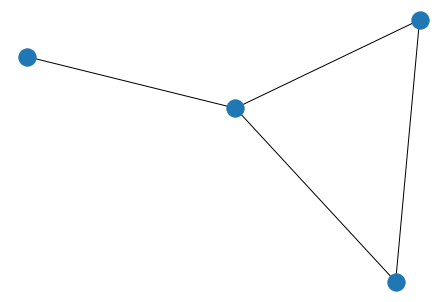

In [12]:
G3 = contract_rename2(G2, m1)